Electronoc Vehicle Data Analysis

In [5]:
# Important Liberires Call
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Import data frame first 
ev_data=pd.read_csv("C:\\Users\keshav\\OneDrive\\Desktop\\EV-data\\Electric_Vehicle_Population_Data.csv")
print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [8]:
# Get the Dataframe information & data type info
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [9]:
# Lets see there is some null values in Data Frame
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [10]:
# Drop the null values from the Data Frame
ev_data=ev_data.dropna()
print(ev_data.head())
print(ev_data.tail())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

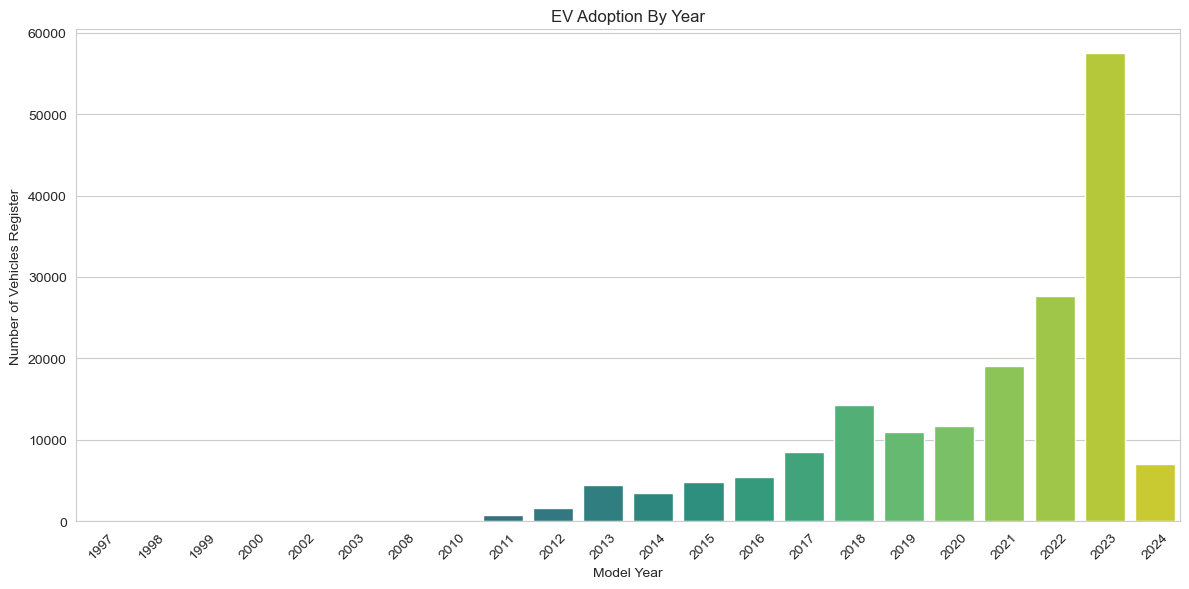

In [11]:
# Visualization of data EV_Adoption over the year
sns.set_style("whitegrid")

plt.figure(figsize=(12,6))
ev_adoption_by_year=ev_data["Model Year"].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")
plt.title("EV Adoption By Year")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles Register")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

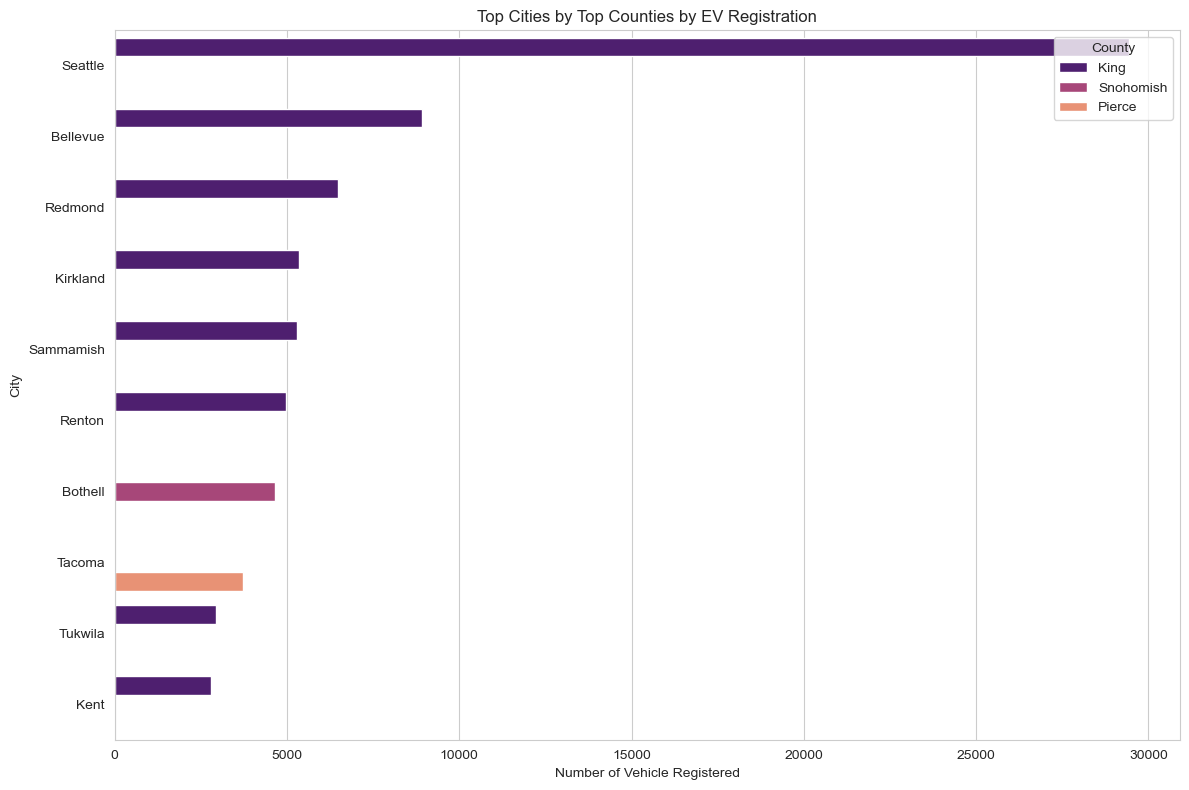

In [13]:
# Geographical distribution at country level
ev_country_distribution=ev_data["County"].value_counts()
top_Counties=ev_country_distribution.head(3).index

# Filter the Dataset for these top counties
top_counties_data=ev_data[ev_data["County"].isin(top_Counties)]
#top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# Analyzing the distribution pf EVs within the cities of these top counteis
ev_city_distribution=top_counties_data.groupby(["County","City"]).size().sort_values(ascending=False).reset_index(name="Number of Vehicles")

# Visualize the top 10 cities across the counties
top_cities=ev_city_distribution.head(10)

plt.figure(figsize=(12,8))
sns.barplot(x="Number of Vehicles", y="City", hue="County", data=top_cities, palette="magma")
plt.title("Top Cities by Top Counties by EV Registration")
plt.xlabel("Number of Vehicle Registered")
plt.ylabel("City")
plt.legend(title="County")
plt.tight_layout()
plt.show()

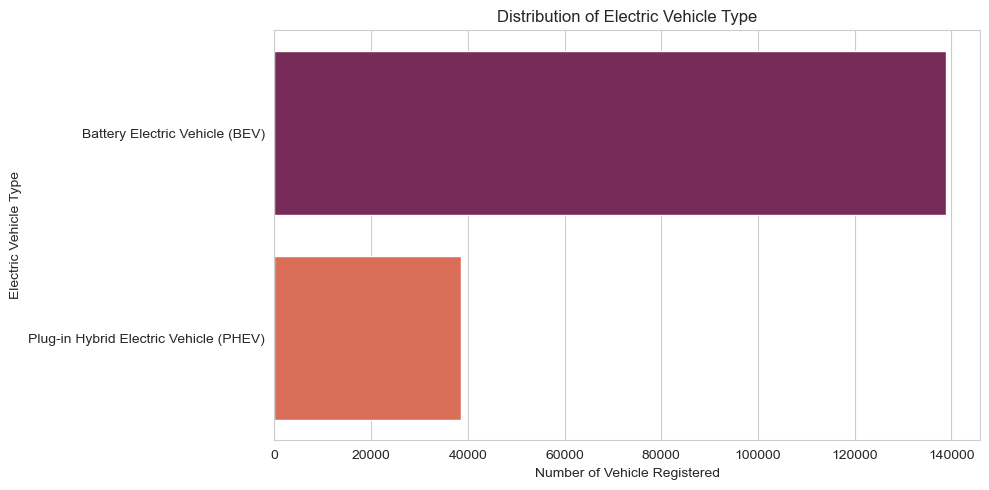

In [14]:
# Analyzing the distribution of electric vehicle type
ev_type_distribution=ev_data["Electric Vehicle Type"].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title("Distribution of Electric Vehicle Type")
plt.xlabel("Number of Vehicle Registered")
plt.ylabel("Electric Vehicle Type")
plt.tight_layout()
plt.show()

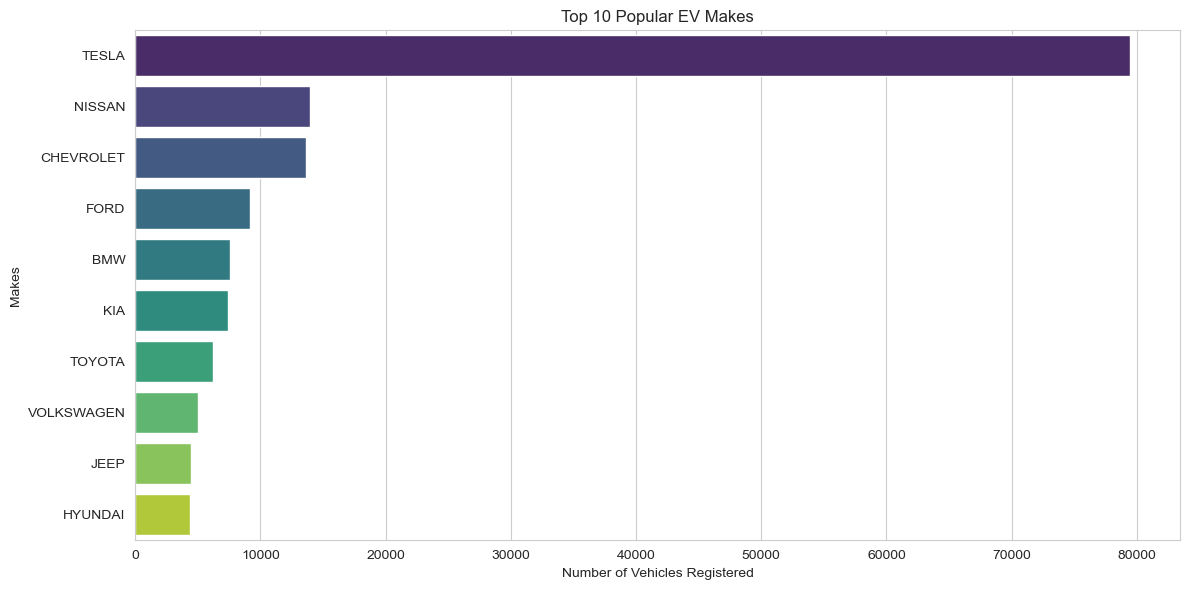

In [15]:
#analyzing the popularity of EV manufacture
ev_make_distribution=ev_data["Make"].value_counts().head(10) 
#limiting to top 10 clarity 

plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values,y=ev_make_distribution.index, palette="viridis")
plt.title("Top 10 Popular EV Makes")
plt.xlabel("Number of Vehicles Registered")
plt.ylabel("Makes")
plt.tight_layout()
plt.show()

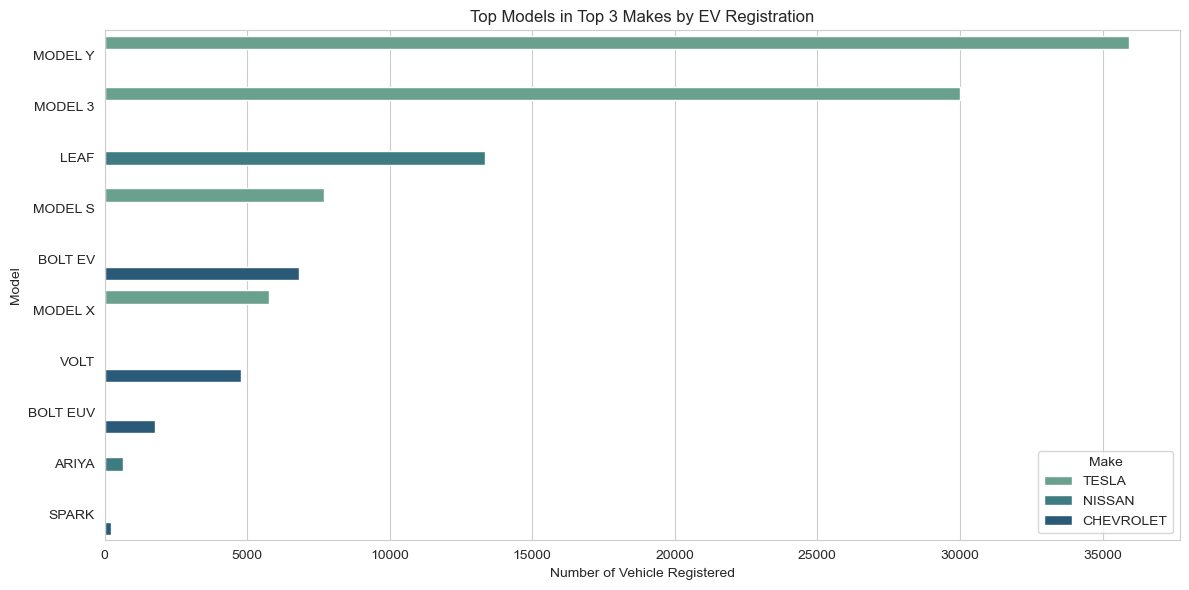

In [16]:
#Selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes=ev_make_distribution.head(3).index

#filtering the dataset for these top manufacture 
top_makes_data=ev_data[ev_data["Make"].isin(top_3_makes)]

#analyzing the popularity of EV models within these top manufacturing
ev_model_distribution_top_makes=top_makes_data.groupby(["Make","Model"]).size().sort_values(ascending=False).reset_index(name="Number of Vehicles")

#visualization the top 10 models across these manufactures for clarity
top_models=ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x="Number of Vehicles",y="Model",hue="Make",data=top_models,palette="crest")
plt.title("Top Models in Top 3 Makes by EV Registration")
plt.xlabel("Number of Vehicle Registered")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

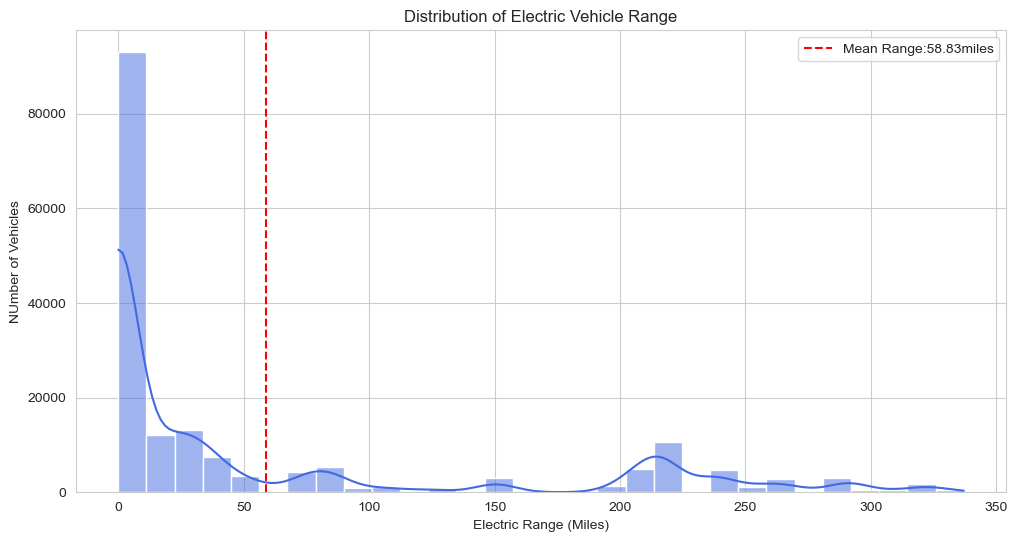

In [17]:
#analyzing the distrubution of electriv range
plt.figure(figsize=(12,6))
sns.histplot(ev_data["Electric Range"],bins=30,kde=True, color="royalblue")
plt.title("Distribution of Electric Vehicle Range")
plt.xlabel("Electric Range (Miles)")
plt.ylabel("NUmber of Vehicles")
plt.axvline(ev_data["Electric Range"].mean(), color="red", linestyle="--", label=f'Mean Range:{ev_data["Electric Range"].mean():.2f}miles')
plt.legend()
plt.show()

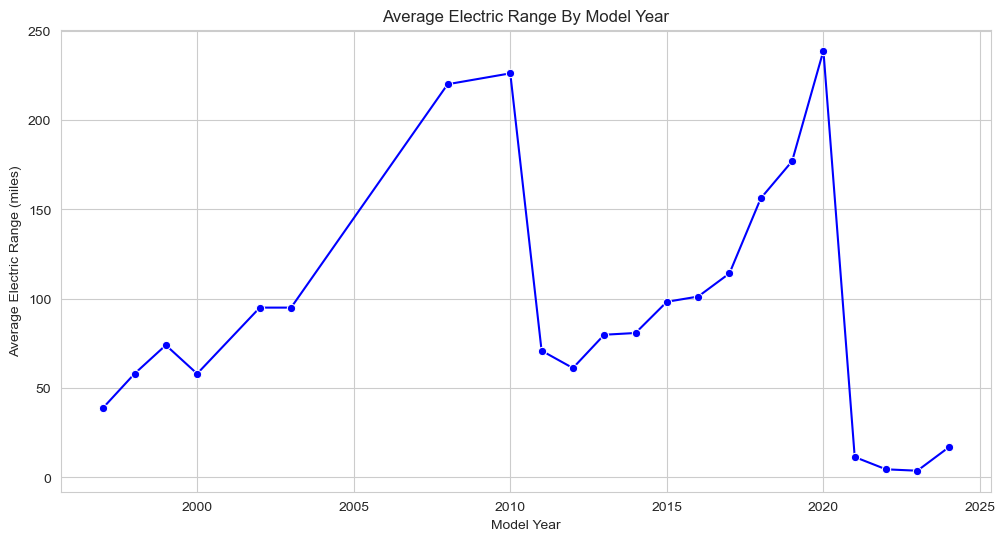

In [18]:
#calculating the average electric range by model year
average_range_by_year=ev_data.groupby("Model Year")["Electric Range"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x="Model Year", y="Electric Range", data=average_range_by_year, marker="o", color="blue")
plt.title("Average Electric Range By Model Year")
plt.xlabel("Model Year")
plt.ylabel("Average Electric Range (miles)")
plt.grid(True)
plt.show()

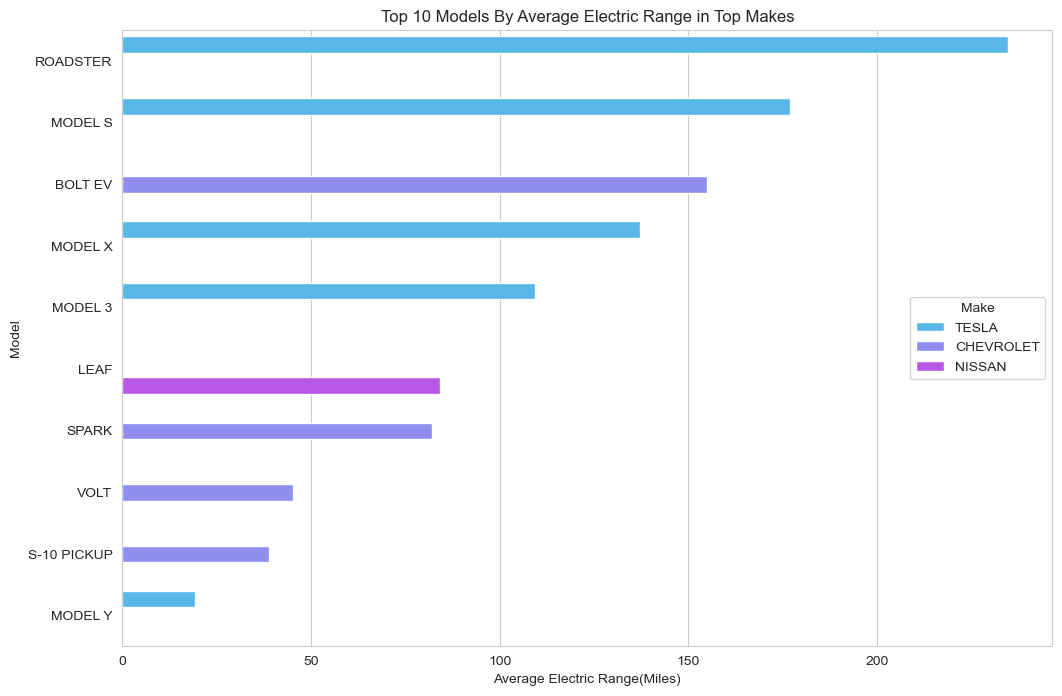

In [22]:
average_range_by_model=top_makes_data.groupby(['Make', 'Model'])["Electric Range"].mean().sort_values(ascending=False).reset_index()

#the top 10 models with the highest average electric range
top_range_models=average_range_by_model.head(10)

plt.figure(figsize=(12,8))
barplot=sns.barplot(x="Electric Range",y="Model",hue="Make",data=top_range_models,palette="cool")
plt.title("Top 10 Models By Average Electric Range in Top Makes")
plt.xlabel("Average Electric Range(Miles)")
plt.ylabel("Model")
plt.legend(title="Make",loc="center right")
plt.show()

In [23]:
#calculate the number of EVs registered each year
ev_registration_counts=ev_data["Model Year"].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64